In [14]:
import numpy as np
from graphqec import BivariateBicycleCode, ThresholdLAB

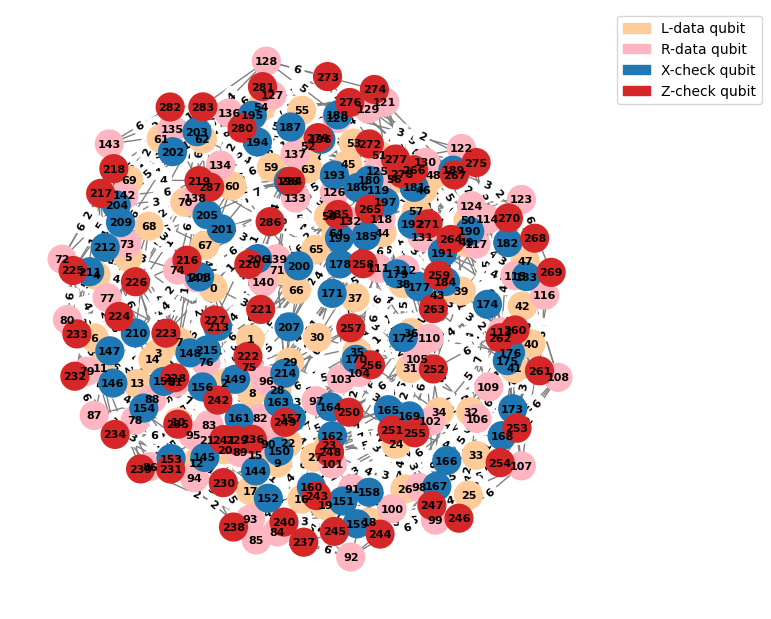

In [15]:
bb = BivariateBicycleCode(
    Lx = 12,
    Ly = 6,
    a1 = 3,
    a2 = 1,
    a3 = 2,
    b1 = 3,
    b2 = 1,
    b3 = 2
)
bb.draw_graph()

In [10]:
th = ThresholdLAB(
    configurations = [{"Lx":6, "Ly": 6, "a1": 3, "a2": 1, "a3": 2, "b1": 3, "b2": 1, "b3": 2}],
    code = BivariateBicycleCode,
    error_rates = np.linspace(0.001, 0.02, 3),
    decoder='bposd'
)

th.collect_stats(
    num_workers = 8,
    max_shots = 10**3,
    max_errors= 100
)

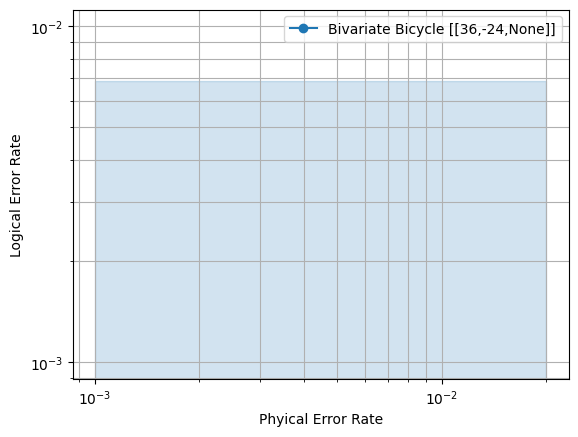

In [12]:
th.plot_stats(
    # x_min = 2e-2, 
    # x_max = 2e-1,
    # y_min = 1e-1, 
    # y_max = 8e-1
)

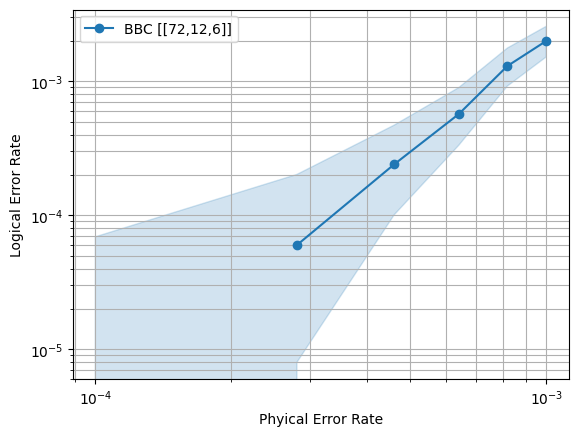

In [16]:
from graphqec import CssCode
from stimbposd import sinter_decoders

bbc = BivariateBicycleCode(
    Lx = 6,
    Ly = 6,
    a1 = 3,
    a2 = 1,
    a3 = 2,
    b1 = 3,
    b2 = 1,
    b3 = 2,
)

A = bbc.A1+bbc.A2+bbc.A3
B = bbc.B1+bbc.B2+bbc.B3

Hx = np.array([list(row) for row in np.hstack((bbc.A,bbc.B))])
Hz = np.array([list(row) for row in np.hstack((bbc.B.T, bbc.A.T))])

cssbbc = CssCode(Hx,Hz)

th = ThresholdLAB(
    configurations =[{"Hx": Hx, "Hz": Hz, "name": "BBC"}],
    code = CssCode,
    error_rates = np.linspace(0.0001, 0.001, 6),
    decoder='bposd'
)

th.collect_stats(
    num_workers = 12,
    max_shots = 10**5,
    max_errors = 5*10**4,
    logic_check = "Z",
    decoder_params = sinter_decoders()
)

th.plot_stats()

In [17]:
th.samples

[sinter.TaskStats(strong_id='200577f8aab9b79dfd3ac2f2cc69f0a481ea693949171ed3aea45dce660b6721', decoder='bposd', json_metadata={'name': 'BBC [[72,12,6]]', 'error': 0.0006399999999999999}, shots=100000, errors=57, seconds=110512.5490000001),
 sinter.TaskStats(strong_id='eb32d1f735efe228faeea32386dbf20c95b0917da985ed91047bfe63c159c316', decoder='bposd', json_metadata={'name': 'BBC [[72,12,6]]', 'error': 0.00028}, shots=100000, errors=6, seconds=54748.56200000009),
 sinter.TaskStats(strong_id='92e05f37ce220f4bb8c63a2647e6e158412c788d715bd47961d7889fd70d9379', decoder='bposd', json_metadata={'name': 'BBC [[72,12,6]]', 'error': 0.0001}, shots=100000, seconds=18524.266000000003),
 sinter.TaskStats(strong_id='5d40844aaf9d83783edba5cc151d0e6aa9bd4f20bb1797842e03372a7ee9921b', decoder='bposd', json_metadata={'name': 'BBC [[72,12,6]]', 'error': 0.001}, shots=100000, errors=200, seconds=155949.74099999992),
 sinter.TaskStats(strong_id='ced9b942da7f8a0db843e098fd604b5dd1fd2e0270c9ec215559835603540